In [115]:
%load_ext autoreload
%autoreload 2
# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from MODEL import TheModel
import time
import tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
model = TheModel()
par   = model.par
sol   = model.sol

In [117]:
t0 = time.time()  # set the starting time
model.setup()
#tools.GaussHermite_lognorm(par.sigma_epsilon,par.Nxi)
model.create_grids()
model.solve()
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time

time: 0.56790113 seconds


In [118]:
#print(f'{par.grid_m}')
for h in range(3):
    print(f'h range: {h} (if 0:0, 1:1/2 and 2:1)')
    print(f'c: {sol.c[par.T-1,h,:]}')
    print(f'v: {sol.v[par.T-1,h,:]}')

h range: 0 (if 0:0, 1:1/2 and 2:1)
c: [1.00000000e-04 4.07006540e-01 8.15270364e-01 1.22490413e+00
 1.63592069e+00 2.04833310e+00 2.46215464e+00 2.87739878e+00
 3.29407923e+00 3.71220992e+00 4.13180499e+00 4.55287884e+00
 4.97544609e+00 5.39952163e+00 5.82512056e+00 6.25225828e+00
 6.68095044e+00 7.11121295e+00 7.54306199e+00 7.97651406e+00
 8.41158592e+00 8.84829464e+00 9.28665758e+00 9.72669243e+00
 1.01684172e+01 1.06118502e+01 1.10570102e+01 1.15039161e+01
 1.19525874e+01 1.24030437e+01 1.28553052e+01 1.33093924e+01
 1.37653263e+01 1.42231281e+01 1.46828195e+01 1.51444228e+01
 1.56079605e+01 1.60734557e+01 1.65409319e+01 1.70104131e+01
 1.74819239e+01 1.79554893e+01 1.84311348e+01 1.89088865e+01
 1.93887711e+01 1.98708158e+01 2.03550485e+01 2.08414975e+01
 2.13301919e+01 2.18211615e+01 2.23144366e+01 2.28100483e+01
 2.33080286e+01 2.38084098e+01 2.43112253e+01 2.48165092e+01
 2.53242966e+01 2.58346230e+01 2.63475253e+01 2.68630409e+01
 2.73812083e+01 2.79020671e+01 2.84256578e+01 2

No handles with labels found to put in legend.


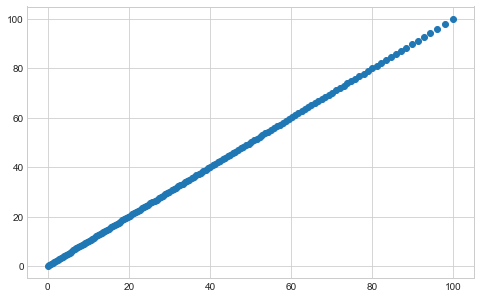

In [119]:
def figure_gridM(m,c):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(m,c)
    plt.legend()
    plt.show()

figure_gridM(par.grid_m,sol.c[par.T-1,h,:])

No handles with labels found to put in legend.


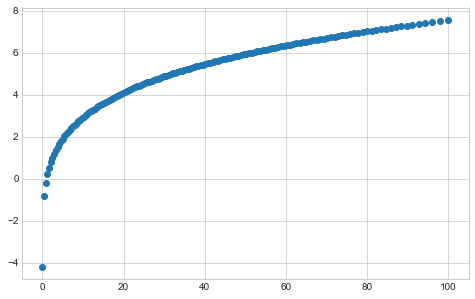

No handles with labels found to put in legend.


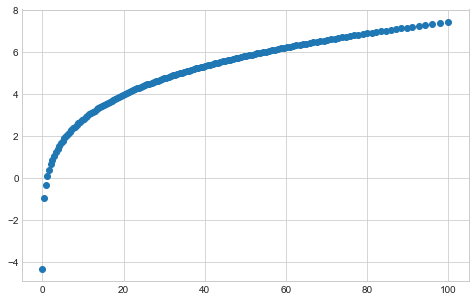

No handles with labels found to put in legend.


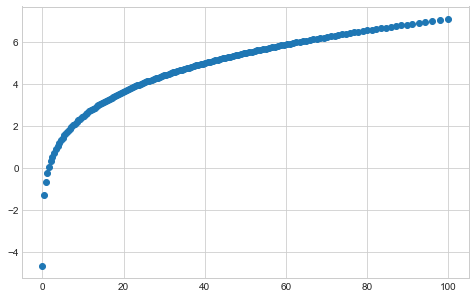

In [120]:
def figure_gridM(m,v):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(m,v)
    plt.legend()
    plt.show()
h=0
figure_gridM(par.grid_m,sol.v[par.T-1,h,:])
h=1
figure_gridM(par.grid_m,sol.v[par.T-1,h,:])
h=2
figure_gridM(par.grid_m,sol.v[par.T-1,h,:])

In [ ]:
# Figure
def figure_multi_dim(par,sol,h):
    p = par.grid_p[i_p]
    if h == 0:
        print(f'h=0')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4]
    elif h ==1:
        print(f'h=1/2')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4]
    else:
        print(f'h=1')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4]
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    for i in ts:
        ax.scatter(par.grid_m,sol.c[i-1,z,:,i_p], label=f't = {i}')
    ax.set_xlabel(f"$m_t$")
    ax.set_ylabel(f"$c(m_t,z_{{t+1}} = {z}, p = {p:.3})$")
    ax.set_xlim([0, 5])
    ax.set_ylim([0,3])
    ax.set_title(f'Consumption function')
    plt.legend()
    plt.show()

figure_multi_dim(model.par,model.sol,1,25)
figure_multi_dim(model.par,model.sol,1,50)
figure_multi_dim(model.par,model.sol,1,75)